In [1]:
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 100)
pd.set_option("max_colwidth", 200)

import numpy as np

from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import RepeatedKFold

import matplotlib.pyplot as plt
import seaborn as sns
import shap
shap.initjs()

In [3]:
ordinal = pd.read_csv('../../Data/BaseOrdinal.csv')
ordinal.shape

(2580, 81)

In [4]:
ordinal = ordinal.drop(['Unnamed: 0'], axis=1)
ordinal.shape

(2580, 80)

In [5]:
X = ordinal.drop(['SalePrice'], axis=1)
y = ordinal.SalePrice

In [6]:
CB = CatBoostRegressor()

In [7]:
CB.fit(X,y, verbose=False)

In [8]:
CB.score(X,y)

0.9915734972781012

In [9]:
explainer = shap.TreeExplainer(CB)

In [10]:
shap_values = explainer.shap_values(X)

In [11]:
len(shap_values)

2580

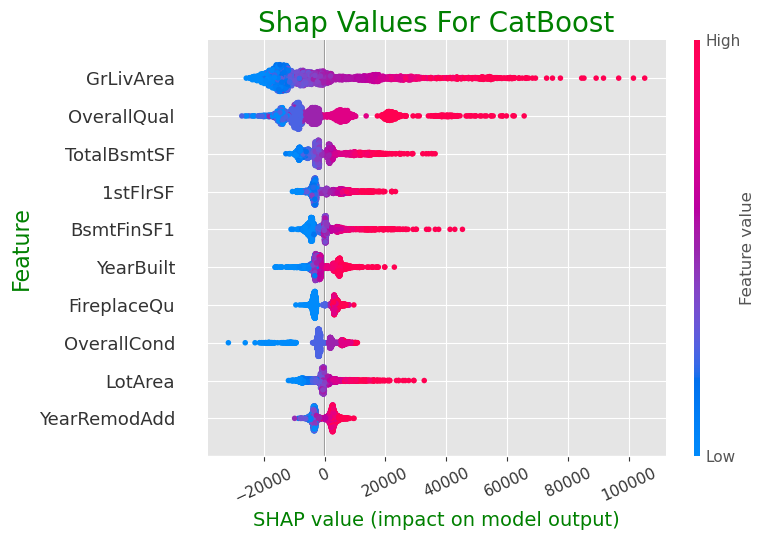

In [12]:
#Shap Global Summary Plot

plt.style.use('default')
plt.style.use('ggplot')

plt.figure(figsize=(8,4))


shap.summary_plot(shap_values, X, show=False, max_display=10)
plt.title('Shap Values For CatBoost', fontsize=20, color='Green')

plt.ylabel('Feature', fontsize=16, color='green')
plt.xlabel('SHAP value (impact on model output)', fontsize=14, color='green')
plt.xticks(rotation=25)

plt.tight_layout()
plt.show()

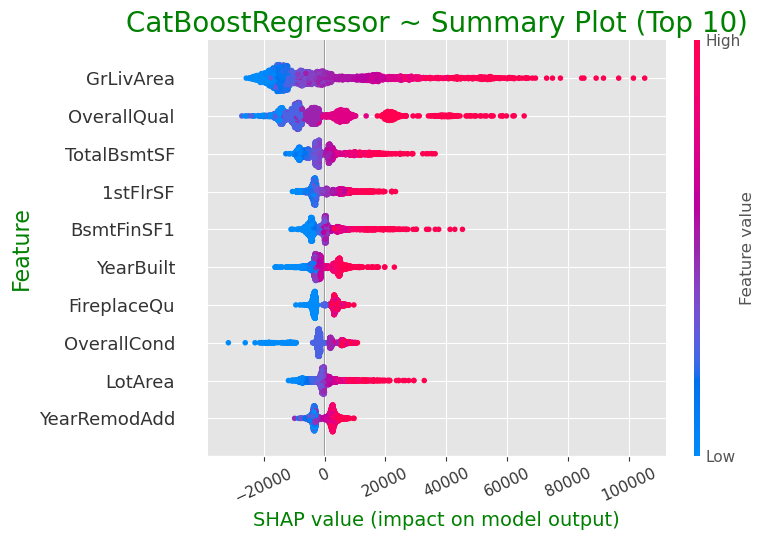

In [13]:
#Shap Global Summary Plot

plt.style.use('default')
plt.style.use('ggplot')

plt.figure(figsize=(8,4))


shap.summary_plot(shap_values, X, show=False, max_display=10)
plt.title('CatBoostRegressor ~ Summary Plot (Top 10)', fontsize=20, color='Green')

plt.ylabel('Feature', fontsize=16, color='green')
plt.xlabel('SHAP value (impact on model output)', fontsize=14, color='green')
plt.xticks(rotation=25)

plt.tight_layout()
plt.show()